# PARTIE 3 : Résultats & hypothèses

# Lecture des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
pd.set_option('display.max_columns', 200)
data = pd.read_csv('./src/speed_dating_clean.csv', encoding='Latin-1')

In [126]:
data.tail()

,index,iid,gender,condtn,wave,round,position,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,match_es_r
7959,8363,552,1,2,21,22,14,5,526.0,0,0.64,0,26.0,3.0,10.526316,10.526316,31.578947,21.052632,10.526316,15.789474,1,10.0,5.0,3.0,2.0,6.0,5.0,6.0,1.0,2.0,25.0,18.0,2.0,1.0,1.0,3.0,6.0,7.0,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,0,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,0.0,3.0,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,9.0,3.0,7.0,6.0,9.0,13.636364
7960,8364,552,1,2,21,22,13,4,527.0,0,0.71,0,24.0,6.0,50.000000,20.000000,10.000000,5.000000,10.000000,5.000000,0,6.0,3.0,7.0,3.0,7.0,2.0,2.0,2.0,2.0,25.0,18.0,2.0,1.0,1.0,3.0,6.0,7.0,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,0,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,0.0,3.0,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,9.0,3.0,7.0,6.0,9.0,13.636364
7961,8365,552,1,2,21,22,19,10,528.0,0,-0.46,0,29.0,3.0,40.000000,10.000000,30.000000,10.000000,10.000000,NaN,0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,25.0,18.0,2.0,1.0,1.0,3.0,6.0,7.0,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,0,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,0.0,3.0,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,9.0,3.0,7.0,6.0,9.0,13.636364
7962,8366,552,1,2,21,22,3,16,529.0,0,0.62,0,22.0,4.0,10.000000,25.000000,25.000000,10.000000,10.000000,20.000000,1,5.0,7.0,5.0,5.0,3.0,6.0,6.0,4.0,2.0,25.0,18.0,2.0,1.0,1.0,3.0,6.0,7.0,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,0,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,0.0,3.0,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,9.0,3.0,7.0,6.0,9.0,13.636364
7963,8367,552,1,2,21,22,2,15,530.0,0,0.01,0,22.0,4.0,20.000000,20.000000,10.000000,15.000000,5.000000,30.000000,1,8.0,8.0,7.0,7.0,7.0,7.0,8.0,5.0,2.0,25.0,18.0,2.0,1.0,1.0,3.0,6.0,7.0,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,0,3.0,7.0,6.0,4.0,8.0,1.0,4.0,5.0,0.0,3.0,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,9.0,3.0,7.0,6.0,9.0,13.636364


# Résultats de l'expérience

## Nombre de matchs

In [3]:
total_matches = round(len(data[data['match']==1])/2)
total_dates = round(len(data)/2)

men_that_matched = data[(data['match']==1) & (data['gender']==0)].groupby('iid').max().reset_index()['iid'].count()
women_that_matched = data[(data['match']==1) & (data['gender']==1)].groupby('iid').max().reset_index()['iid'].count()
persons_that_matched = data[data['match']==1].groupby('iid').max().reset_index()['iid'].count()

total_persons = data['iid'].nunique()
total_men = data[data['gender']==0]['iid'].nunique()
total_women = data[data['gender']==1]['iid'].nunique()

print(f'Number of matches: {total_matches} on {total_dates} dates')
print(f'Percentage of matching: {round(total_matches/total_dates*100,2)} %')
print()
print(f'Number of persons that matched: {persons_that_matched} on {total_persons} participants')
print(f'Number of men that matched: {men_that_matched} on {total_men} male participants')
print(f'Number of women that matched: {women_that_matched} on {total_women} female participants')

Number of matches: 658 on 3982 dates
Percentage of matching: 16.52 %

Number of persons that matched: 442 on 543 participants
Number of men that matched: 215 on 269 male participants
Number of women that matched: 227 on 274 female participants


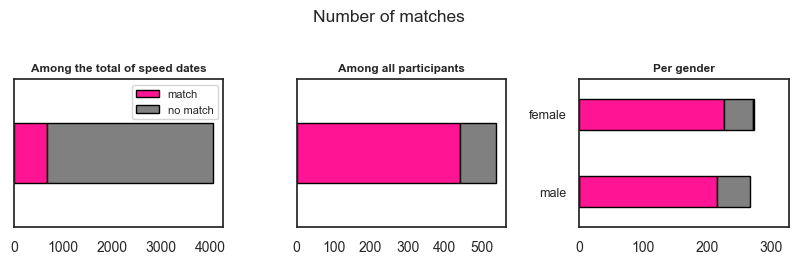

In [97]:
# Visualisation avec Seaborn et Matplotlib
sns.set(rc={'figure.figsize':(10, 2.5)}, style='white')
colors = ['deeppink', 'gray']
fig, axes = plt.subplots(1,3)
fig.subplots_adjust(hspace=0.350, wspace=0.350)

total_match_df = pd.DataFrame({'yes': [674], 'no': [3395]})
total_persons_match_df = pd.DataFrame({'yes': [441], 'no': [98]})
match_per_gender_df = pd.DataFrame({'yes': [215, 226], 'no': [52, 46], 'gender': [0, 1]})

total_match_df.plot(kind='barh', stacked=True, color=colors, edgecolor='black', width=.35, ax = axes[0])
total_persons_match_df.plot(kind='barh', stacked=True, color=colors, edgecolor='black', width=.35, ax = axes[1])
match_per_gender_df.plot(kind='barh', stacked=True, color=colors, edgecolor='black', width=.4, ax = axes[2])

fig.suptitle('Number of matches', fontsize=12.5)
fig.subplots_adjust(top=.7)
axes[0].set_title("Among the total of speed dates", fontsize=8.5, fontweight='bold')
axes[1].set_title("Among all participants", fontsize=8.5, fontweight='bold')
axes[2].set_title("Per gender", fontsize=8.5, fontweight='bold')
axes[2].set_ylabel('')
axes[2].set_xlabel('')
axes[0].set_xticks([i for i in range(0,4001,1000)], [i for i in range(0,4001,1000)], fontsize=10)
axes[1].set_xticks([i for i in range(0,501,100)], [i for i in range(0,501,100)], fontsize=10)
axes[2].set_xticks([i for i in range(0,401,100)], [i for i in range(0,401,100)], fontsize=10)
axes[2].set_yticks([0,1],['male', 'female'],fontsize=9)
axes[0].set_yticks([])
axes[1].set_yticks([])
axes[1].legend('', frameon=False)
axes[2].legend('', frameon=False)
axes[0].legend(labels=['match','no match'], fontsize=8, loc='upper right')
plt.margins(x=0.2)
plt.show()

## Scores obtenus

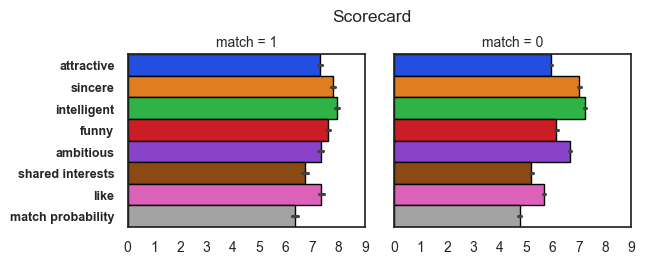

In [44]:
eval_col = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']
score_match_0_df = data[data['match']==0][eval_col]
score_match_1_df = data[data['match']==1][eval_col]

sns.set(rc={'figure.figsize':(6.5, 2.5)}, style='white')
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(hspace=0.125, wspace=0.125)

colors = sns.color_palette('bright', 8)
sns.barplot(data = score_match_1_df, orient = 'h', palette = colors, ax = axes[0], edgecolor='black', width=1)
sns.barplot(data = score_match_0_df,orient = 'h', palette = colors,ax = axes[1], edgecolor='black',  width=1)

fig.suptitle('Scorecard', fontsize=12.5)
fig.subplots_adjust(top=.8)
axes[0].set_title('match = 1', fontsize=10)
axes[1].set_title('match = 0', fontsize=10)
axes[0].set_yticks([i for i in range(0,8)], ['attractive', 'sincere', 'intelligent', 'funny', 'ambitious', 'shared interests', 'like', 'match probability'], fontsize=9, fontweight='bold')
axes[1].set_yticks([i for i in range(0,8)], ['','','','','','','',''])
axes[0].set_xticks([i for i in range(0,10)],[i for i in range(0,10)], fontsize=10)
axes[1].set_xticks([i for i in range(0,10)], [i for i in range(0,10)], fontsize=10)
plt.show()

# Hypothèses

## Matrices de corrélation

Nous construisons les matrices de corrélation pour déceler si certains facteurs impactent la décision des participants.

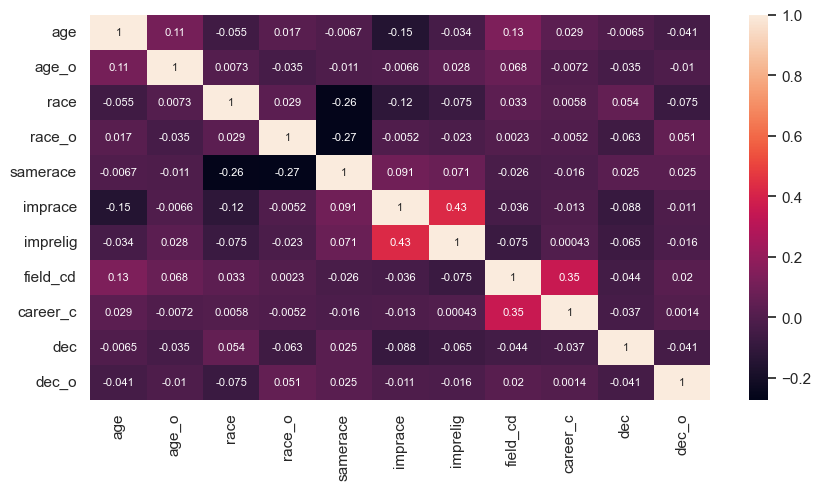

In [99]:
# Quelle est la corrélation entre les caractéristiques démographiques et la décision finale ?
corr = ['age', 'age_o', 'race', 'race_o', 'samerace', 'imprace', 'imprelig', 
        'field_cd', 'career_c', 'dec', 'dec_o']
corr_df = data[corr]
corr = corr_df.corr()
sns.set(rc={"figure.figsize":(10, 5)})
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"fontsize":8}
)
plt.show()

Le fait d'avoir la même origine (samerace) a une légère corrélation positive avec la décision finale. 

--> <ins>Hypothèse</ins> : les personnes ayant la même origine ethnique sont plus susceptibles de matcher

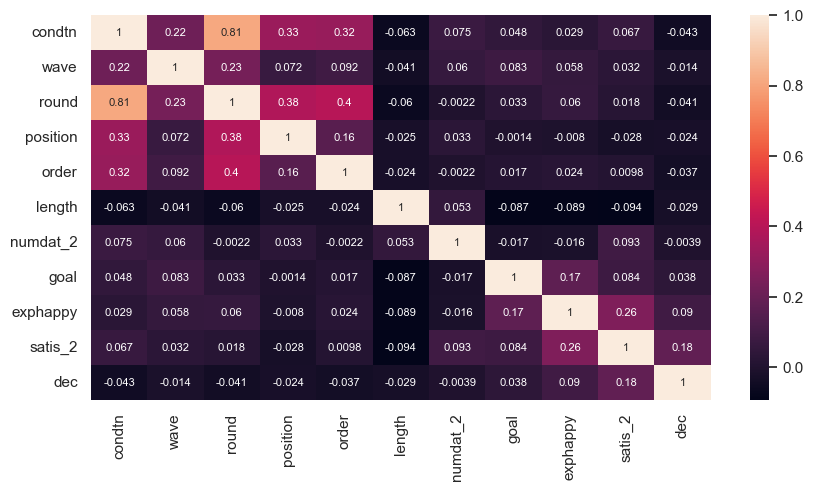

In [100]:
# Quelle est la corrélation entre les conditions de l'expérience (format, environnement) et la décision finale ?
# Entre les attentes et objectifs du participant et sa décision finale ?
corr = ['condtn', 'wave', 'round', 'position', 'order', 'length', 'numdat_2',
        'goal', 'exphappy', 'satis_2', 'dec']
corr_df = data[corr]
corr = corr_df.corr()
sns.set(rc={"figure.figsize":(10, 5)})
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"fontsize":8}
)
plt.show()

L'état d'esprit positif (exphappy) et la satisfaction du participant (satis_2) a une légère corrélation positive avec la décision finale. 

L'objectif (goal) présente aussi une légère corrélation positive avec la décision finale.

--> <ins>Hypothèses</ins> : 
- les personnes qui démarrent avec un état d'esprit positif sur l'expérience sont plus susceptibles de donner une réponse positive  

- les personnes les plus affirmées sur leur objectif sont plus susceptibles de donner une réponse positive

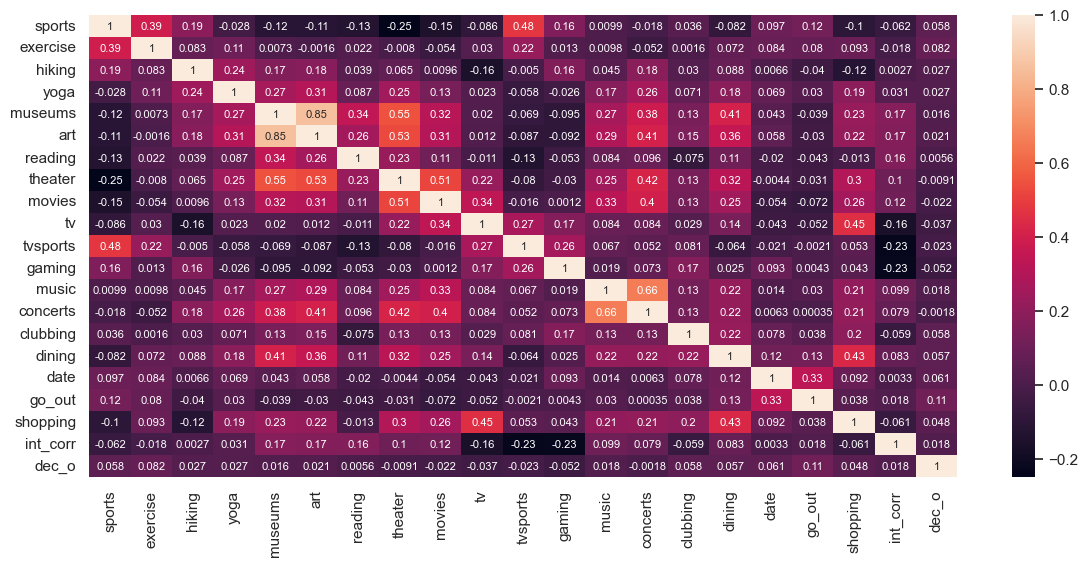

In [101]:
# Quelle est la corrélation entre les hobbies / habitudes sociales et la décision du partenaire ?
corr = ['sports', 'exercise', 'hiking', 'yoga',
        'museums', 'art', 'reading', 'theater', 'movies', 
        'tv', 'tvsports', 'gaming', 'music', 'concerts', 
        'clubbing', 'dining', 'date', 'go_out', 'shopping',  
        'int_corr', 'dec_o']
corr_df = data[corr]
corr = corr_df.corr()
sns.set(rc={"figure.figsize":(14, 6)})
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"fontsize":8}
)
plt.show()

Les activités sportives (sports, exercise), sociales (dining, go_out) et culturelles (museums, art) ont une légère corrélation positive avec la décision du partenaire.

En revanche les activités passives (tv, gaming, movies) ont une légère corrélation négative avec la décision du partenaire.

--> <ins>Hypothèse</ins> : les personnes actives et sociables ont plus de chance de matcher que les personnes sédentaires.

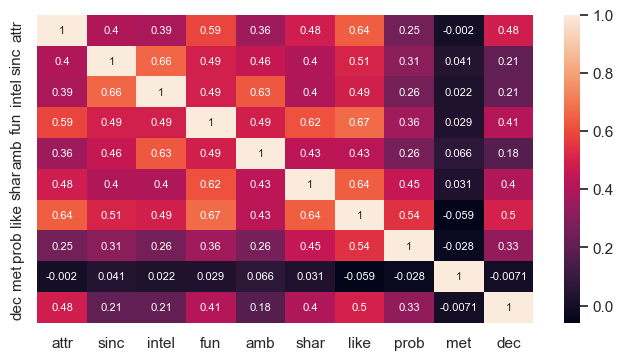

In [102]:
# Quelle est la corrélation entre les qualités perçues et la décision finale ?
corr = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'dec']
corr_df = data[corr]
corr = corr_df.corr()
sns.set(rc={"figure.figsize":(8, 4)})
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"fontsize":8}
)
plt.show()

L'attractivité, l'humour et le partage de centres d'intérêt ont une corrélation positive avec la décision finale.

Les participants apprécient particulièrement chez l'autre (corrélation avec le champ like) :  
l'humour (0.67), l'attractivité (0.64), le partage de centres d'intérêt (0.64), la sincérité (0.51), l'intelligence (0.49).

En revanche le fait de connaître l'autre personne influence négativement sur la probabilité de matcher.

--> <ins>Hypothèses</ins> : 
- l'attractivité, l'humour et le partage de centres d'intérêt sont les qualités les plus favorables pour matcher

- la sincérité, l'intelligence et l'ambition sont moins importantes

- le fait de connaître l'autre personne diminue les chances de matcher

# Approfondissement

Nous approfondissons les pistes que nous a révélées les matrices de corrélation.

## Qualités recherchées

Nous comparons :
- Les notes attribuées VS les préférences du partenaire
- Les notes attribuées VS l'auto-évaluation  

Nous mettons en parallèle les cas où la personne a eu une réponse positive (dec_o vaut 1) avec ceux où la réponse est négative (dec_o vaut 0).

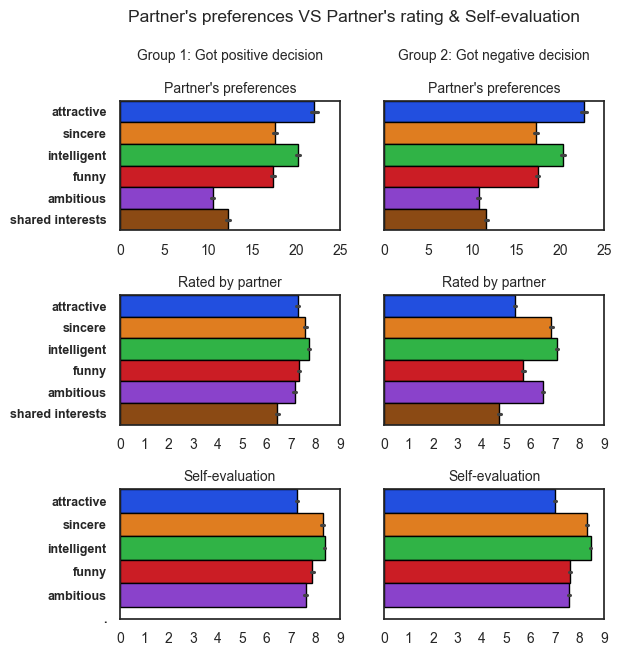

In [10]:
eval_o = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
pref_o = ["pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha"]
self_eval = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']

eval_o_df = data[data['dec_o']==0][eval_o]
pref_o_df = data[data['dec_o']==0][pref_o]
self_eval_df = data[data['dec_o']==0][self_eval]

success_eval_o_df = data[data['dec_o']==1][eval_o]
success_pref_o_df = data[data['dec_o']==1][pref_o]
success_self_eval_df = data[data['dec_o']==1][self_eval]

sns.set(rc={'figure.figsize':(6.25, 7)}, style='white')
colors = sns.color_palette('bright', 6)
fig, axes = plt.subplots(3,2)
fig.subplots_adjust(hspace=0.5, wspace=0.2)

sns.barplot(data = success_pref_o_df, orient = 'h', palette = colors, ax = axes[0,0], edgecolor = 'black', width=1)
sns.barplot(data = success_eval_o_df,orient = 'h', palette = colors,ax = axes[1,0], edgecolor = 'black', width=1)
sns.barplot(data = success_self_eval_df, orient = 'h', palette = colors, ax = axes[2,0], edgecolor = 'black', width=1)

sns.barplot(data = pref_o_df, orient = 'h', palette = colors, ax = axes[0,1], edgecolor = 'black', width=1)
sns.barplot(data = eval_o_df,orient = 'h', palette = colors,ax = axes[1,1], edgecolor = 'black', width=1)
sns.barplot(data = self_eval_df, orient = 'h', palette = colors, ax = axes[2,1], edgecolor = 'black', width=1)

fig.suptitle("Partner's preferences VS Partner's rating & Self-evaluation", fontsize=12.5)
fig.subplots_adjust(top=.85)

axes[0,0].set_title("Group 1: Got positive decision\n\nPartner's preferences", fontsize=10)
axes[1,0].set_title("Rated by partner", fontsize=10)
axes[2,0].set_title('Self-evaluation', fontsize=10)

axes[0,1].set_title("Group 2: Got negative decision\n\nPartner's preferences", fontsize=10)
axes[1,1].set_title("Rated by partner", fontsize=10)
axes[2,1].set_title('Self-evaluation', fontsize=10)

axes[0,0].set_yticks([i for i in range(0,6)], ['attractive', 'sincere', 'intelligent', 'funny', 'ambitious', 'shared interests'], fontsize=9, fontweight='bold')
axes[1,0].set_yticks([i for i in range(0,6)], ['attractive', 'sincere', 'intelligent', 'funny', 'ambitious', 'shared interests'], fontsize=9, fontweight='bold')
axes[2,0].set_yticks([i for i in range(0,6)], ['attractive', 'sincere', 'intelligent', 'funny', 'ambitious','.'], fontsize=9, fontweight='bold')

axes[0,1].set_yticks([i for i in range(0,6)], ['','','','','',''])
axes[1,1].set_yticks([i for i in range(0,6)], ['','','','','',''])
axes[2,1].set_yticks([i for i in range(0,6)], ['','','','','',''])

axes[0,0].set_xticks([i for i in range(0,26,5)],[i for i in range(0,26,5)], fontsize=10)
axes[1,0].set_xticks([i for i in range(0,10)], [i for i in range(0,10)], fontsize=10)
axes[2,0].set_xticks([i for i in range(0,10)], [i for i in range(0,10)], fontsize=10)

axes[0,1].set_xticks([i for i in range(0,26,5)],[i for i in range(0,26,5)], fontsize=10)
axes[1,1].set_xticks([i for i in range(0,10)], [i for i in range(0,10)], fontsize=10)
axes[2,1].set_xticks([i for i in range(0,10)], [i for i in range(0,10)], fontsize=10)
plt.show()

### Résultats :

- Nous observons que l'attractivité et l'intelligence sont les qualités les plus appréciées.  
L'ambition et le partage de centres d'intérêt arrivent en dernière position.

- Cependant lorsque la réponse est négative, il semble que ce qui fait davantage défaut est l'attractivité, l'humour et le manque de points d'intérêt communs. L'intelligence ne semble pas jouer davantage en faveur d'une réponse positive.

- Nous observons que les notes des personnes ayant reçu une réponse positive sont plus élevées que celles ayant eu une réponse négative, ce qui est logique. De plus, pour ces personnes les notes obtenues sont plutôt en concordance avec leur auto-évaluation (égales ou légèrement inférieures).

- Par contre les personnes ayant obtenu une réponse négative, ont une perception élevée de leurs qualités personnelles. Les notes obtenues et l'auto-évaluation ne sont pas en concordance. Nous notons un écart entre 1,0 et 1,5 points sur toutes les qualités.

--> <ins>Hypothèse</ins> : les personnes qui matchent ont une perception juste de soi et de leur valeur.

## L'état d'esprit

<ins>Être optimiste et affirmé sur ses objectifs influence t-il l'issue du speed date ?</ins>

In [11]:
# Nous regroupons les speed dates par objectif puis nous calculons pour chaque objectif le nombre de décisions positives données et la part qu'elles représentent dans l'ensemble des décisions observées
# Nous faisons le même travail avec les données de satisfaction (exphappy et satis_2)

dec_by_goal = round(data.groupby('goal').sum()['dec']/data.groupby('goal').count()['dec']*100,2).to_frame().reset_index()
dec_by_exphappy = round(data.groupby('exphappy').sum()['dec']/data.groupby('exphappy').count()['dec']*100,2).to_frame().reset_index()
dec_by_satis = round(data.groupby('satis_2').sum()['dec']/data.groupby('satis_2').count()['dec']*100,2).to_frame().reset_index()

dec_merge = pd.merge(dec_by_exphappy, dec_by_satis, left_on='exphappy', right_on='satis_2')
dec_merge.drop(['satis_2'], axis=1, inplace=True)
dec_merge.rename(columns={'dec_x':'exphappy', 'dec_y':'satis_2', 'exphappy':'rating'}, inplace=True)

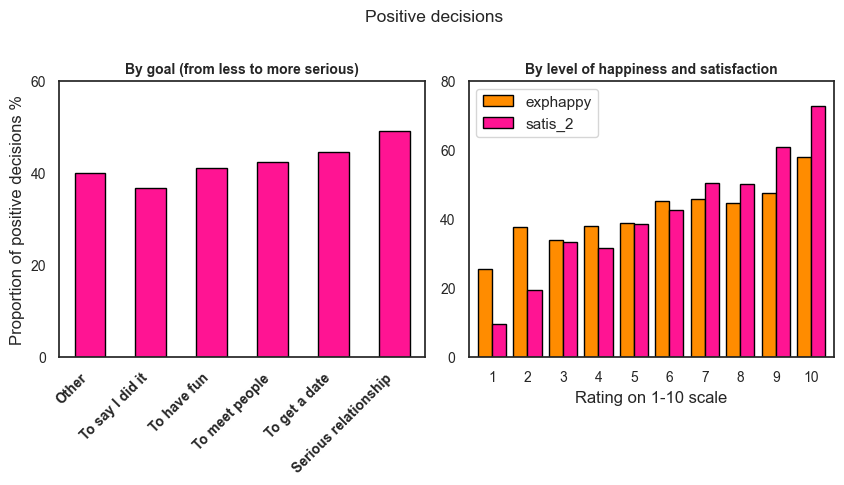

In [14]:
# Visualisation avec Seaborn et Matplotlib
sns.set(rc={'figure.figsize':(10, 4)}, style='white')
colors = ['deeppink', 'gray']
fig, axes = plt.subplots(1,2)
fig.subplots_adjust(hspace=0.350, wspace=0.120)

colors = ['darkorange','deeppink']
dec_by_goal.set_index('goal').plot(kind='bar', stacked=False, color=['deeppink'], edgecolor='black', width=.5, ax = axes[0])
dec_merge.set_index('rating').plot(kind='bar', stacked=False, color=colors, edgecolor='black', width=.8, ax = axes[1])

fig.suptitle('Positive decisions', fontsize=12.5)
fig.subplots_adjust(top=.8)
axes[0].set_title('By goal (from less to more serious)', fontsize=10, fontweight='bold')
axes[1].set_title('By level of happiness and satisfaction', fontsize=10, fontweight='bold')

axes[0].set_xlabel('')
axes[1].set_xlabel('Rating on 1-10 scale', fontsize=12)
axes[0].set_ylabel('Proportion of positive decisions %')

axes[0].set_yticks([i for i in range(0,61,20)], [i for i in range(0,61,20)], fontsize=10)
axes[1].set_yticks([i for i in range(0,81,20)], [i for i in range(0,81,20)], fontsize=10)
axes[0].set_xticks([i for i in range(0,6)], ['Other', 'To say I did it', 'To have fun', 'To meet people', 'To get a date', 'Serious relationship'], rotation=45, ha="right", fontsize=10, fontweight='bold')
axes[1].set_xticks([i for i in range(0,10)], [i for i in range(1,11)], rotation=0, fontsize=10)

axes[0].legend('', frameon=False)
plt.show()

### Résultats :

- On observe que plus l'objectif du participant est déterminé plus la part de décisions positives est élevée

- On observe que plus le l'état d'esprit du participant est positif (niveaux de bonheur et de satisfaction élevés) plus la part de décisions positives est élevée

--> <ins>Hypothèse</ins> : les personnes qui démarrent avec un état d'esprit positif et un but affirmé sont plus susceptibles de donner une réponse favorable à l'issue du speed date.

## Origine et religion

<ins>L'origine et la religion influence t-elle la décision finale ?</ins>

In [120]:
# Nous regroupons les speed dates par le critère samerace puis nous calculons pour chaque groupe le taux de match
match_by_samerace = data.groupby('samerace').sum()['match']/data.groupby('samerace').count()['match']*100
print('Global matching rate:', round(total_matches/total_dates*100,2), '%\n')
print('Matching rate (not same race):', round(match_by_samerace[0],2), '%\n')
print('Matching rate (same race):', round(match_by_samerace[1],2), '%')

Global matching rate: 16.52 %

Matching rate (not same race): 16.06 %

Matching rate (same race): 17.23 %


In [6]:
# Nous calculons la part de décisions positives par importance de la religion
dec_by_imprelig = data.groupby('imprelig').sum()['dec']/data.groupby('imprelig').count()['dec']*100
dec_by_imprelig = dec_by_imprelig.to_frame().reset_index()
dec_by_imprelig

,imprelig,dec
0,1.0,46.004170
1,2.0,41.626214
2,3.0,39.956803
3,4.0,44.186047
4,5.0,33.832335
5,6.0,42.739274
6,7.0,39.207048
7,8.0,41.948310
8,9.0,35.636364
9,10.0,30.573248


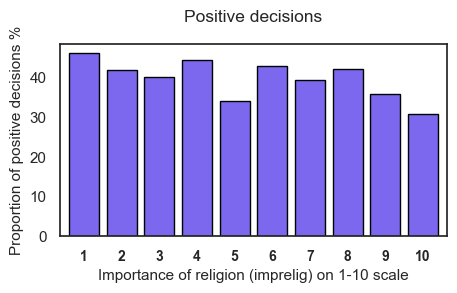

In [55]:
# Visualisation avec Seaborn et Matplotlib
sns.set(rc={'figure.figsize':(5, 2.5)}, style='white')
dec_by_imprelig.set_index('imprelig').plot(kind='bar', color=['mediumslateblue'], width=.8, edgecolor='black')
plt.title('Positive decisions', fontsize=12.5, pad=16)
plt.xlabel('Importance of religion (imprelig) on 1-10 scale', fontsize=11)
plt.ylabel('Proportion of positive decisions %', fontsize=11)
plt.xticks([i for i in range(0,10)],[i for i in range(1,11)], rotation=0, fontsize=10,  fontweight='bold')
plt.legend('', frameon=False)
plt.show()

### Résultats :

- Le taux de match dans le groupe de personnes partageant la même origine est supérieur au taux de match global

- Il est de 1 point plus élevé que dans celui où les personnes ne partagent pas la même origine

- On observe qu'il y a moins de décisions positives lorsque la religion est considérée comme importante : 
    - 30% de décisions positives lorsque la religion est très importante (notée 10/10)  
    - 46% de décisions positives lorsque la religion n'est pas importante (notée 1/10)


--> <ins>Hypothèses</ins> : 
- Le fait de partager la même origine augmente les chances de matcher

- Le fait d'être très exigeant sur la religion diminue les chances de matcher

## Age

<ins>La différence d'âge a-t-elle un impact ?</ins>

In [132]:
print('Average age of participants:')
print('Men:', round(data[(data['gender']==0)]['age'].median()), 'years - Men that matched:', round(data[(data['gender']==0) & (data['match']==1)]['age'].median()), 'years')
print('Women:', round(data[(data['gender']==1)]['age'].median()), 'years - Women that matched:', round(data[(data['gender']==1) & (data['match']==1)]['age'].median()), 'years')

Average age of participants:
Men: 26 years - Men that matched: 25 years
Women: 27 years - Women that matched: 26 years


In [36]:
age_df = data[data['gender']==0][['iid', 'gender', 'age', 'age_o', 'match', 'dec', 'dec_o']]
age_df['age_difference'] = abs(age_df['age'] - age_df['age_o'])
age_df['age_difference'].value_counts().to_frame().reset_index().sort_values(by='age_difference')

mask1 = age_df['age_difference'] < 1
mask2 = (age_df['age_difference'] >=1) &  (age_df['age_difference'] < 3)
mask3 = (age_df['age_difference'] >=3) &  (age_df['age_difference'] < 5)
mask4 = (age_df['age_difference'] >= 5) & (age_df['age_difference'] < 10)
mask5 = age_df['age_difference'] >= 10


matching_rate1 = round(age_df[mask1]['match'].value_counts()[1]/len(age_df[mask1])*100,2)
matching_rate2 = round(age_df[mask2]['match'].value_counts()[1]/len(age_df[mask2])*100,2)
matching_rate3 = round(age_df[mask3]['match'].value_counts()[1]/len(age_df[mask3])*100,2)
matching_rate4 = round(age_df[mask3]['match'].value_counts()[1]/len(age_df[mask4])*100,2)
matching_rate5 = round(age_df[mask5]['match'].value_counts()[1]/len(age_df[mask5])*100,2)

print('Matching rate depending on the difference of age:')
print(f'Less than 1 year: {matching_rate1}%')
print(f'Between 1 and 3 years: {matching_rate2}%')
print(f'Between 3 and 5 years: {matching_rate3}%') 
print(f'Between 5 and 10 years: {matching_rate4}%')
print(f'Greater than 10 years: {matching_rate5}%')


Matching rate depending on the difference of age:
Less than 1 year: 19.82%
Between 1 and 3 years: 18.47%
Between 3 and 5 years: 16.3%
Between 5 and 10 years: 15.8%
Greater than 10 years: 10.16%


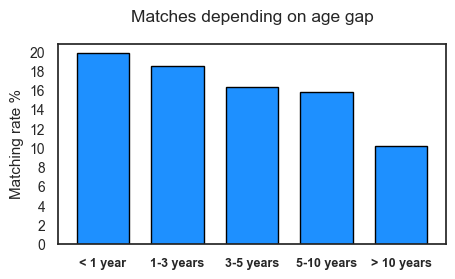

In [129]:
# Visualisation avec Seaborn et Matplotlib
age_diff_df = pd.DataFrame({'matching_rate': [19.82, 18.47, 16.3, 15.8, 10.16], 
                            'age_gap': ['< 1 year', '1-3 years', '3-5 years', '5-10 years', '> 10 years']})
sns.set(rc={'figure.figsize':(5, 2.6)}, style='white')
age_diff_df.set_index('age_gap').plot(kind='bar', color=['dodgerblue'], width=.7, edgecolor='black')
plt.title('Matches depending on age gap', fontsize=12.5, pad=16)
plt.xlabel('')
plt.ylabel('Matching rate %', fontsize=11)
plt.yticks([i for i in range(0,21,2)],[i for i in range(0,21,2)], fontsize=10)
plt.xticks([i for i in range(0,5)],['< 1 year', '1-3 years', '3-5 years', '5-10 years', '> 10 years'], rotation=0, fontsize=9,  fontweight='bold')
plt.legend('', frameon=False)
plt.show()

### Résultats : 

- On observe que le taux de matching est plus élevé et supérieur à la valeur moyenne lorsque la différence d'âge est inférieure à 5 ans.   
Le taux de matching atteint presque 20% dans le groupe où la différence d'âge est nulle.

- On observe que le taux de matching diminue lorsque l'écart d'âge entre les 2 personnes augmente.   
Lorsque celui-ci est supérieur à 10 ans, le taux de matching chute à 10%.

--> <ins>Hypothèse</ins>: le fait d'avoir un faible écart d'âge augmente les chances de matcher.

## Style de vie

<ins>Être actif ou sédentaire a-t-il un impact ?</ins>

In [3]:
hobbies_cols = ['match', 'dec', 'dec_o',
        'sports', 'exercise', 'hiking', 'yoga',
        'museums', 'art', 'reading', 'theater', 'movies', 
        'tv', 'tvsports', 'gaming', 'music', 'concerts', 
        'clubbing', 'dining', 'date', 'go_out', 'shopping']

hobbies_df = data.groupby('iid').max()[hobbies_cols].reset_index()
hobbies_df = hobbies_df.iloc[:,1::]
hobbies_dec_o_1_df = hobbies_df[hobbies_df['dec_o']==1].median().to_frame().reset_index()
hobbies_dec_o_0_df = hobbies_df[hobbies_df['dec_o']==0].median().to_frame().reset_index()
hobbies_merge_df = pd.merge(hobbies_dec_o_1_df,hobbies_dec_o_0_df, left_on='index', right_on='index')
hobbies_merge_df.rename(columns={'0_x':'match', '0_y':'no_match'}, inplace=True)
hobbies_merge_df = hobbies_merge_df.iloc[3::, :]

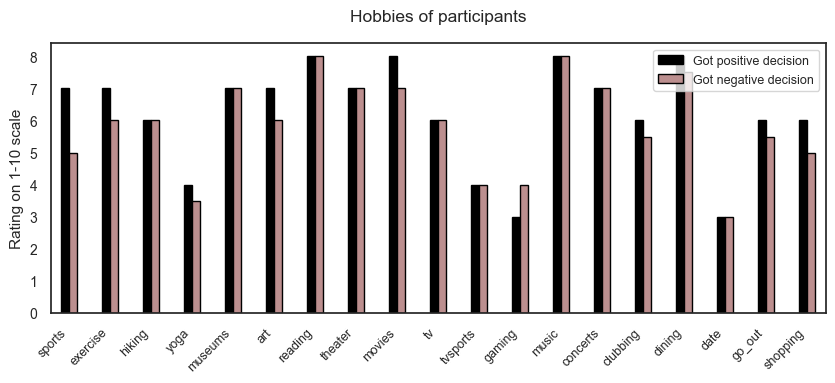

In [5]:
sns.set(rc={'figure.figsize':(10, 3.5)}, style='white')
hobbies_merge_df.set_index('index').plot(kind='bar', color=['black', 'rosybrown'], width=.4, edgecolor='black')
plt.title('Hobbies of participants', fontsize=12.5, pad=16)
plt.xlabel('')
plt.ylabel('Rating on 1-10 scale', fontsize=11)
plt.yticks([i for i in range(0,9)], fontsize=10)
myticks = range(0,len(hobbies_merge_df))
mylabels = hobbies_merge_df['index'].values.tolist()
plt.xticks(ticks = myticks ,labels = mylabels, fontsize=9, fontweight='normal', rotation=45, ha="right") 
plt.legend(['Got positive decision', 'Got negative decision'], fontsize=9)
plt.show()

### Résultats : 

- Les personnes ayant obtenu des réponses positives font plus de sport que celles ayant échoué (écart de 2 points sur la pratique d'un sport collectif, écart d'1 point sur l'exercice physique)

- On note qu'elles s'intéressent davantage à l'art (écart d'1 point)

- Elles sont aussi un peu plus sociables (léger écart sur les sorties entre amis, en soirée et au restaurant)

- Elles portent plus d'intérêt au shopping, ce qui peut suggérer qu'elles accordent plus de soin à leur apparence

- Les personnes qui n'ont pas obtenu de réponse positive jouent davantage aux jeux vidéos (écart de 1 point)

--> <ins>Hypothèses</ins> : avoir un style de vie actif, être sociable et porter davantage de soin à son apparence peuvent augmenter les chances de matcher. Avoir un style de vie sédentaire et accorder plus de son temps aux jeux vidéos diminue son attractivité

## Ordre de passage et position

<ins>Passer en première ou dernière position a-t-il un impact ?</ins>

In [92]:
# Le nombre de personnes rencontrées diffère d'une session à l'autre
# C'est pourquoi nous calculons l'ordre de passage relatif
order_cols = ['iid', 'match', 'order', 'round']
order_df = data.copy()
order_df = order_df[order_cols]
order_df['order_r'] = round(order_df['order']/order_df['round']*100)
order_df = order_df.sort_values(by='order_r')[['match', 'order_r']]
order_df = order_df.groupby('order_r').sum()['match'].to_frame().reset_index()

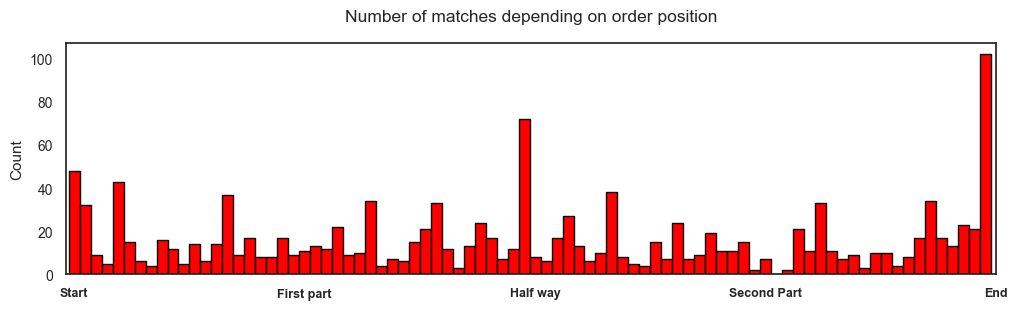

In [169]:
# Visualisation avec Seaborn et Matplotlib
sns.set(rc={'figure.figsize':(12,3)}, style='white')
order_df.set_index('order_r').plot(kind='bar', color=['red'], edgecolor='black', width=1)
plt.title('Number of matches depending on order position', fontsize=12.5, pad=16)
plt.xlabel('')
plt.ylabel('Count', fontsize=11)
plt.yticks(fontsize=10)
myticks = range(0,len(order_df) + 1,int(len(order_df)/4))
mylabels = ['Start', 'First part', 'Half way', 'Second Part', 'End']
plt.xticks(ticks = myticks ,labels = mylabels, fontsize=9, fontweight='bold', rotation=0, ha="center") 
plt.legend('', frameon=False)
plt.show()

<ins>La table où les participants se trouvent a-t-elle un impact ?</ins>

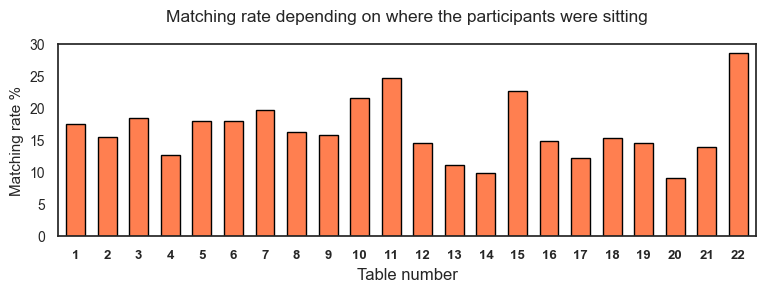

In [202]:
# Visualisation avec Seaborn et Matplotlib
position_df = (data.groupby('position').sum()['match']/data.groupby('position').count()['match']*100).sort_index().to_frame().reset_index()
sns.set(rc={'figure.figsize':(9,2.5)}, style='white')
position_df.set_index('position').plot(kind='bar', color=['coral'], edgecolor='black', width=.6)
plt.title('Matching rate depending on where the participants were sitting', fontsize=12.5, pad=16)
plt.xlabel('Table number')
plt.ylabel('Matching rate %', fontsize=11)
myticks = range(0,len(position_df))
mylabels = [i for i in range(1,23)]
plt.yticks(fontsize=10, fontweight='normal')
plt.xticks(ticks = myticks ,labels = mylabels, fontsize=9.5, fontweight='bold', rotation=0, ha="center") 
plt.legend('', frameon=False)
plt.show()

### Résultats : 

- On observe que le nombre de matchs diffère suivant l'ordre de passage

- Il y a davantage de matchs tout au début de la session de speed dating, en milieu de session (lors de la fin de la première série), et à la toute fin de la session

- On observe que le taux de matching diffère suivant la table où l'on se situe

- La table n°22 enregistre le plus grand taux de matching soit 30%. Le taux de matching est meilleur sur les tables n°10, 11 et 15. Il est particulièrement faible sur les tables n°4, 13, 14 et 20

--> <ins>Hypothèses</ins> : 

- Le fait d'être le premier candidat, le dernier candidat de la première série de speed dates, ou le tout dernier candidat de la session entière augmente ses chances de matcher

- La table où l'on se situe influence sur l'issue du speed date. Être assis à la table n°22 augmente ses chances de matcher, alors qu'être assis en table n°20 diminue ses chances de matcher 

## Format

<ins>Le nombre de personnes rencontrées et la durée des speed dates ont-ils un impact ?</ins>

In [52]:
numdat_df = (data.groupby('numdat_2').sum()['match']/data.groupby('numdat_2').count()['match']*100).sort_index().to_frame().reset_index()
length_df = (data.groupby('length').sum()['match']/data.groupby('length').count()['match']*100).sort_index().to_frame().reset_index()
format_df = pd.merge(numdat_df, length_df, left_on='numdat_2', right_on='length')
format_df.drop(['length'], axis=1, inplace=True)
format_df.rename(columns={'match_x':'numdat_2', 'match_y':'length', 'numdat_2':'rating'}, inplace=True)

,rating,numdat_2,length
0,1.0,17.147436,15.555556
1,2.0,15.835267,23.428571
2,3.0,17.034943,17.719358


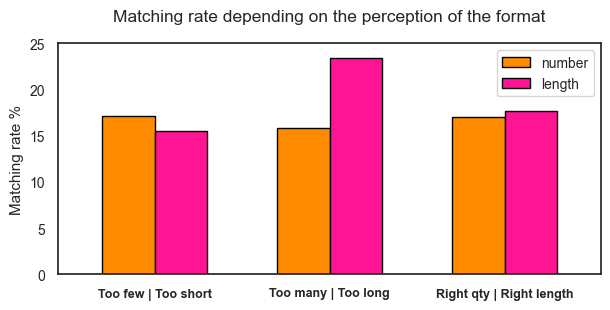

In [53]:
# Visualisation avec Seaborn et Matplotlib
display(format_df)
sns.set(rc={'figure.figsize':(7,3)}, style='white')
format_df.set_index('rating').plot(kind='bar', color=['darkorange', 'deeppink'], edgecolor='black', width=.6)
plt.title('Matching rate depending on the perception of the format', fontsize=12.5, pad=16)
plt.xlabel('')
plt.ylabel('Matching rate %', fontsize=11)
myticks = range(0,len(format_df))
mylabels = ['Too few | Too short', 'Too many | Too long', 'Right qty | Right length']
plt.yticks([i for i in range(0,26,5)], fontsize=10, fontweight='normal')
plt.xticks(ticks = myticks ,labels = mylabels, fontsize=9, fontweight='bold', rotation=0, ha="center") 
plt.legend(['number', 'length'], fontsize=10)
plt.show()

### Résultats : 

- On observe que le taux de matching est meilleur (17%) dans le cas où les personnes ont jugé le nombre de personnes rencontrées correct et trop faible. Il est moins bon (15%) lorsque les personnes estimaient avoir eu trop de rencontres

- On observe que le taux de matching est largement meilleur (23%) lorsque les personnes jugeaient la durée des speed dates trop longue. En revanche le taux de matching est moins bon lorsque les personnes estimaient que les rencontres étaient trop courtes (15%)

--> <ins>Hypothèse</ins> : Le format influence l'issue des rencontres : 

- Avoir un choix large diminue les chances de matcher, avoir un choix réduit augmente les chances de matcher

- Avoir plus de temps de rencontre augmente les chances de matcher, avoir moins de temps de rencontre diminue les chances de matcher

## Saisonnalité

<ins>La saison durant laquelle ont lieu les speed dating a-t-elle un impact ?</ins>

On remarque que le taux de matching est inégal suivant les sessions.

Les sessions de speed dating étant organisées à différentes periodes de l'année nous nous demandons s'il existe un lien entre la saison et le taux de matching.

In [20]:
# Le taux de matching est inégal suivant les sessions
wave_cols = ['iid', 'match', 'wave']
wave_df = data.copy()
wave_df = wave_df[wave_cols]
wave_df.groupby('wave').sum()['match']/wave_df.groupby('wave').count()['match']*100

wave
1     31.000000
2     10.416667
3     13.750000
4     20.588235
5     30.000000
6     22.222222
7     17.131474
8     18.000000
9     14.745308
10    18.518519
11    14.512472
12    10.714286
13    18.604651
14    16.507937
15    18.387097
16    25.581395
17    17.391304
18    10.000000
19    16.666667
20    11.904762
21    15.042373
Name: match, dtype: float64

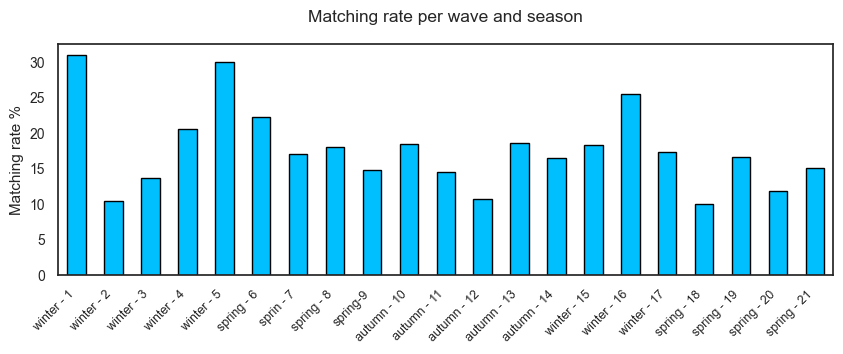

In [21]:
# Visualisation avec Seaborn et Matplotlib
sns.set(rc={'figure.figsize':(10,3)}, style='white')
per_wave_df = (wave_df.groupby('wave').sum()['match']/wave_df.groupby('wave').count()['match']*100).to_frame().reset_index()
per_wave_df.set_index('wave').plot(kind='bar', color=['deepskyblue'], edgecolor='black', width=.5)
plt.title('Matching rate per wave and season', fontsize=12.5, pad=16)
plt.xlabel('')
plt.ylabel('Matching rate %', fontsize=11)
plt.yticks(fontsize=10)
myticks = range(0,len(per_wave_df))
mylabels = ['winter - 1', 'winter - 2', 'winter - 3', 'winter - 4', 'winter - 5', 
            'spring - 6', 'sprin - 7', 'spring - 8', 'spring-9',
            'autumn - 10', 'autumn - 11', 'autumn - 12',  'autumn - 13', 'autumn - 14',
            'winter - 15', 'winter - 16', 'winter - 17',
            'spring - 18', 'spring - 19', 'spring - 20', 'spring - 21']
plt.xticks(ticks = myticks ,labels = mylabels, fontsize=9, fontweight='normal', rotation=45, ha="right") 
plt.legend('', frameon=False)
plt.show()

In [22]:
# Ajout de la colonne saison
autumn = [10, 11, 12, 14]
winter = [1, 2, 3, 4, 5, 13, 15, 16, 17]
spring = [6, 7, 8, 9, 18, 19, 20, 21]

def assign_season(wave):
    if wave in winter:
        return '1_winter'
    elif wave in autumn:
        return '3_autumn'
    elif wave in spring:
        return '2_spring'
    else:
        return ''

wave_df['season'] = wave_df['wave'].apply(assign_season)
wave_df = (wave_df.groupby('season').sum()['match']/wave_df.groupby('season').count()['match']*100).to_frame().reset_index()

,season,match
0,1_winter,18.736988
1,2_spring,15.649867
2,3_autumn,14.714424


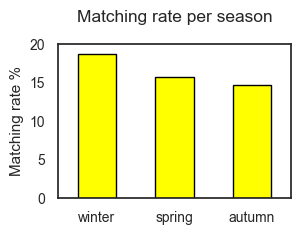

In [23]:
# Visualisation avec Seaborn et Matplotlib
sns.set(rc={'figure.figsize':(3,2)}, style='white')
wave_df.set_index('season').plot(kind='bar', color='yellow', edgecolor='black', width=.5)
display(wave_df)
plt.title('Matching rate per season', fontsize=12.5, pad=16)
plt.xlabel('')
plt.ylabel('Matching rate %', fontsize=11)
plt.yticks(fontsize=10)
myticks = range(0,len(wave_df))
mylabels = ['winter', 'spring', 'autumn']
plt.xticks(ticks = myticks ,labels = mylabels, fontsize=10, fontweight='normal', rotation=0, ha="center") 
plt.yticks([i for i in range(0,21,5)])
plt.legend('', frameon=False)
plt.show()

### Résultats :

- Le taux de matching dépasse la moyenne (16,52%) en hiver où il atteint presque 19%

- Il passe en dessous de la moyenne en automne et au printemps

--> <ins>Hypothèse</ins> : Il y a plus de chance de matcher en hiver plutôt qu'au printemps ou en automne.

## Compréhension des attentes du sexe opposé

<ins>Avoir une bonne compréhension des attentes du sexe opposé a-t-il un impact ?</ins>

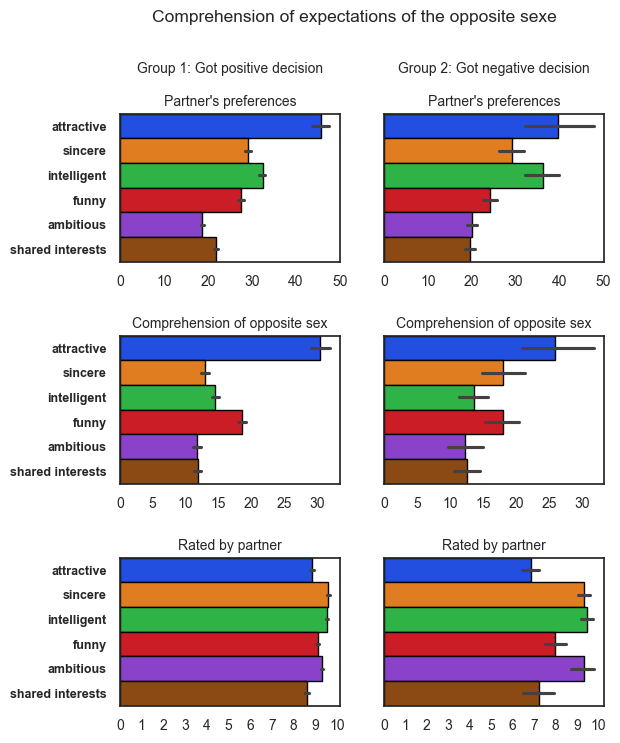

In [47]:
pref_o = ["dec_o", "pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha"]
attr2 = ['dec_o', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']
eval_o = ['dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']

cols_group = [pref_o, attr2, eval_o]
df_group = []
df_group_fail = []
df_group_success = []

for group in cols_group:
    df_group.append(data.groupby('iid').max()[group])

for i in range(0,3):
    df_group_fail.append(df_group[i][df_group[i]['dec_o'] == 0].iloc[:,1::])

for i in range(0,3):
    df_group_success.append(df_group[i][df_group[i]['dec_o'] == 1].iloc[:,1::])

sns.set(rc={'figure.figsize':(6.25, 8)}, style='white')
colors = sns.color_palette('bright', 6)
fig, axes = plt.subplots(3,2)
fig.subplots_adjust(hspace=0.5, wspace=0.2)

sns.barplot(data = df_group_success[0], orient = 'h', palette = colors, ax = axes[0,0], edgecolor = 'black', width=1)
sns.barplot(data = df_group_success[1],orient = 'h', palette = colors,ax = axes[1,0], edgecolor = 'black', width=1)
sns.barplot(data = df_group_success[2], orient = 'h', palette = colors, ax = axes[2,0], edgecolor = 'black', width=1)

sns.barplot(data = df_group_fail[0], orient = 'h', palette = colors, ax = axes[0,1], edgecolor = 'black', width=1)
sns.barplot(data = df_group_fail[1],orient = 'h', palette = colors,ax = axes[1,1], edgecolor = 'black', width=1)
sns.barplot(data = df_group_fail[2], orient = 'h', palette = colors, ax = axes[2,1], edgecolor = 'black', width=1)

fig.suptitle("Comprehension of expectations of the opposite sexe", fontsize=12.5)
fig.subplots_adjust(top=.85)

axes[0,0].set_title("Group 1: Got positive decision\n\nPartner's preferences", fontsize=10)
axes[1,0].set_title("Comprehension of opposite sex", fontsize=10)
axes[2,0].set_title('Rated by partner', fontsize=10)

axes[0,1].set_title("Group 2: Got negative decision\n\nPartner's preferences", fontsize=10)
axes[1,1].set_title("Comprehension of opposite sex", fontsize=10)
axes[2,1].set_title('Rated by partner', fontsize=10)

axes[0,0].set_yticks([i for i in range(0,6)], ['attractive', 'sincere', 'intelligent', 'funny', 'ambitious', 'shared interests'], fontsize=9, fontweight='bold')
axes[1,0].set_yticks([i for i in range(0,6)], ['attractive', 'sincere', 'intelligent', 'funny', 'ambitious', 'shared interests'], fontsize=9, fontweight='bold')
axes[2,0].set_yticks([i for i in range(0,6)], ['attractive', 'sincere', 'intelligent', 'funny', 'ambitious','shared interests'], fontsize=9, fontweight='bold')

axes[0,1].set_yticks([i for i in range(0,6)], ['','','','','',''])
axes[1,1].set_yticks([i for i in range(0,6)], ['','','','','',''])
axes[2,1].set_yticks([i for i in range(0,6)], ['','','','','',''])

axes[0,0].set_xticks([i for i in range(0,51,10)],[i for i in range(0,51,10)], fontsize=10)
axes[1,0].set_xticks([i for i in range(0,31,5)],[i for i in range(0,31,5)], fontsize=10)
axes[2,0].set_xticks([i for i in range(0,11)],[i for i in range(0,11)], fontsize=10)

axes[0,1].set_xticks([i for i in range(0,51,10)],[i for i in range(0,51,10)], fontsize=10)
axes[1,1].set_xticks([i for i in range(0,31,5)],[i for i in range(0,31,5)], fontsize=10)
axes[2,1].set_xticks([i for i in range(0,11)],[i for i in range(0,11)], fontsize=10)

plt.show()

### Résultats : 

- Les personnes ayant obtenu des réponses positives et celles ayant obtenu que des réponses négatives partagent la même perception des attentes du sexe opposé

- L'attractivité est perçue comme la qualité déterminante pour l'autre sexe (30 points). Les autres qualités sont perçues comme moins importantes (entre 10 et 20 points). L'humour est considérée comme la deuxième qualité la plus importante après l'attractivité

- Les personnes ayant obtenu que des réponses négatives donnent moins d'importance à l'attractivité (25 points en moyenne contre 30 points dans l'autre groupe). En revanche elles donnent plus d'importance à la sincérité (20 points contre 15 points dans l'autre groupe) alors que ce critère ne semble pas être décisif

- On observe un écart entre les préférences du partenaire (pf_o_att) et la perception des attentes de l'autre. Cependant, cette perception n'est pas totalement erronnée puisqu'on remarque que lorsque le partenaire n'a pas donné de réponse positive, c'est effectivement l'attractivité et l'humour qui font défaut

--> <ins>Hypothèse :</ins> 

- Les personnes qui n'ont pas matché voient la sincérité comme un critère important pour l'autre sexe, or il semblerait que ce critère n'est pas décisif

- En globalité, les personnes dans les deux groupes ont conscience que l'attractivité et humour sont les qualités décisives pour matcher. Mais cette compréhension ne joue pas davantage en faveur de la décision finale.